###Problem Statement
1. How to achieve customer segmentation using K-means clustering in Python.
2. Who are our target customers for applying customer strategy.



###Connecting Drive

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install dabl

###Importing necessary library

In [33]:
# for basic mathematics operation 
import numpy as np
# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

###Importing dataset

In [34]:
data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')


###Examining the data

In [35]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
data.shape

(200, 5)

In [37]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [38]:
#To check the sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
147,148,Female,32,77,74
12,13,Female,58,20,15
165,166,Female,36,85,75


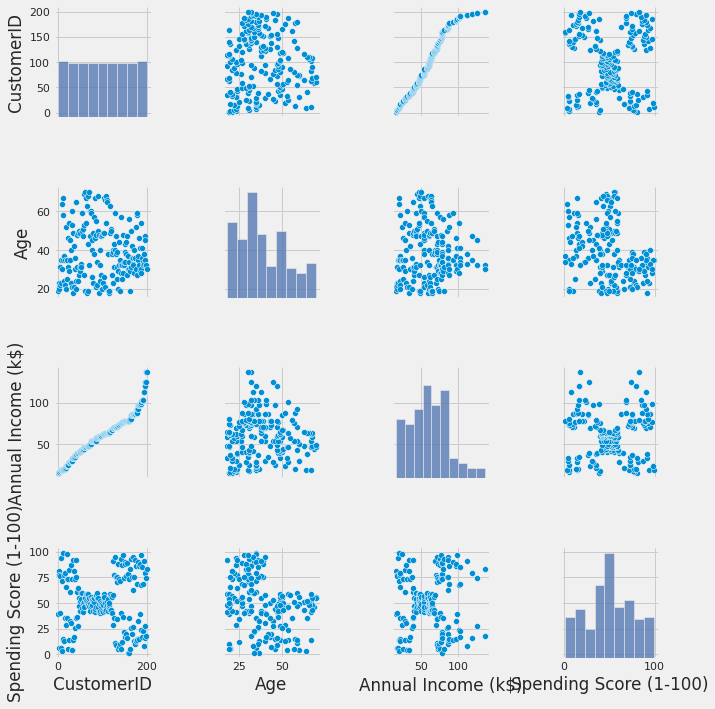

In [39]:
# lets get the pairplot for the data
sns.pairplot(data)
plt.show()

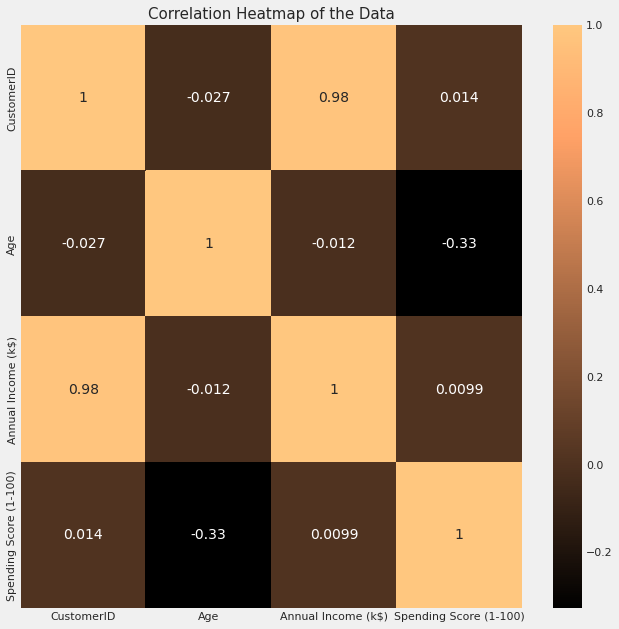

In [40]:
# lets check the Correlation Heat Map of the Data
sns.heatmap(data.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36e3cb7d90>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36eaba1750>]],
       dtype=object)]

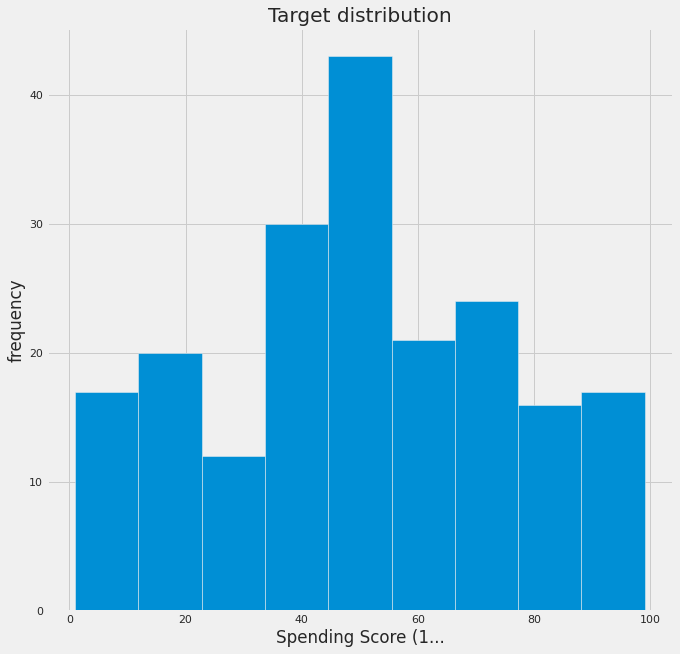

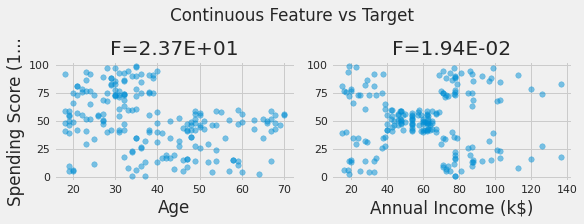

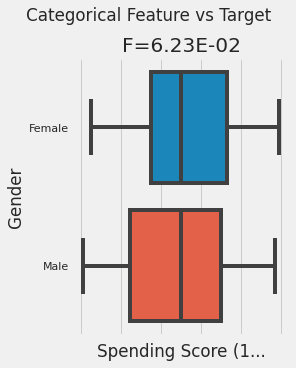

In [41]:
# lets analyze the data with respect to Spending Score
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36e5f0c990>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36e61011d0>]],
       dtype=object)]

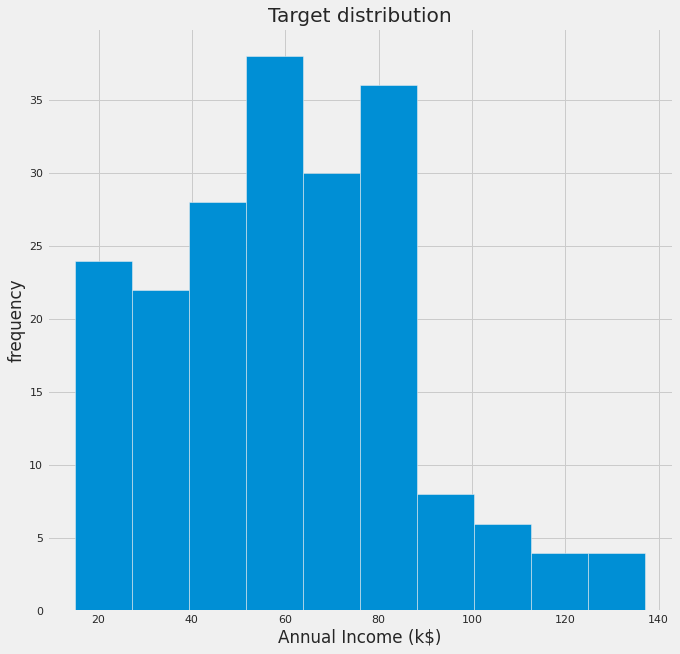

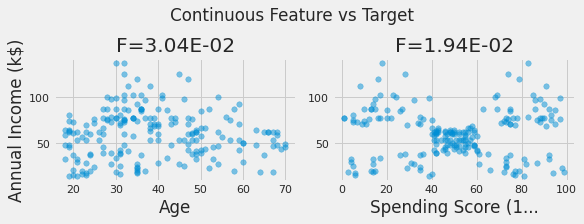

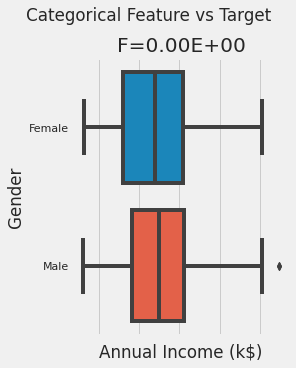

In [42]:
# lets analyze the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')

###Descriptive Statistics

In [43]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [45]:
# checking if there is any NULL data
data.isnull().any().any()

False

###Data Visualization

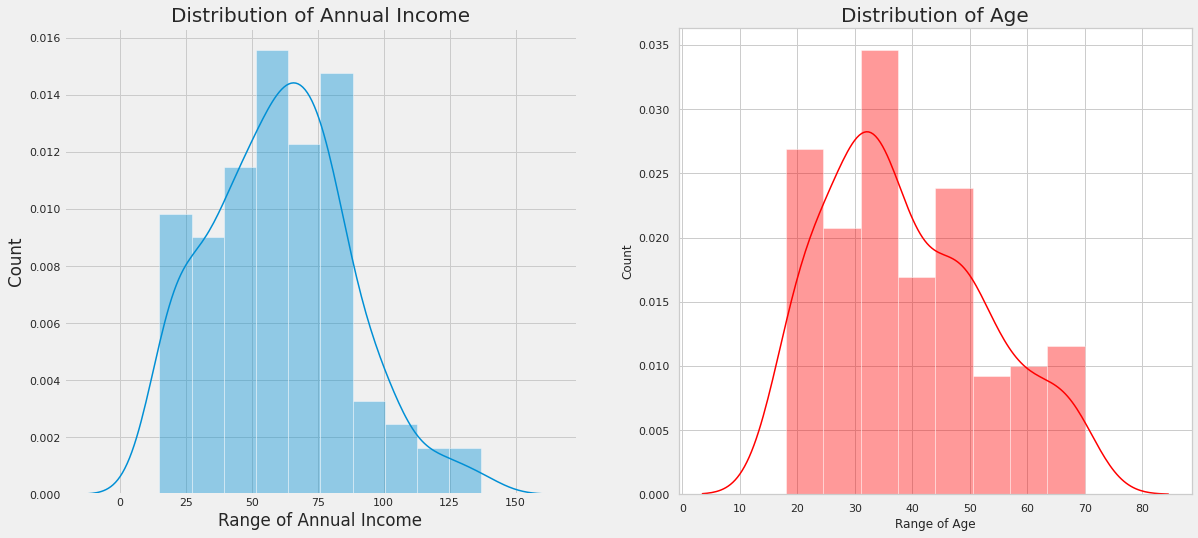

In [46]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

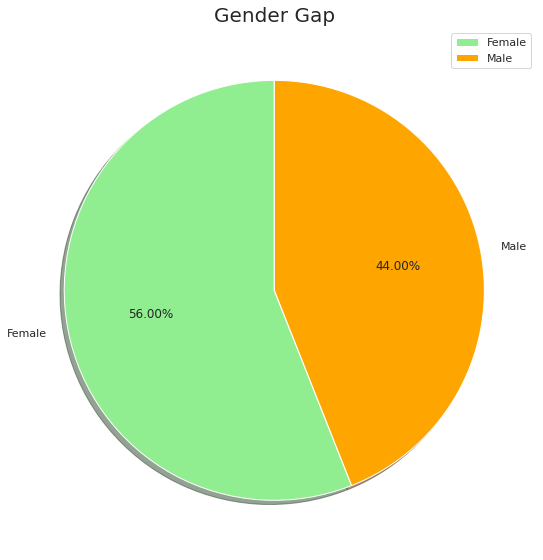

In [47]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

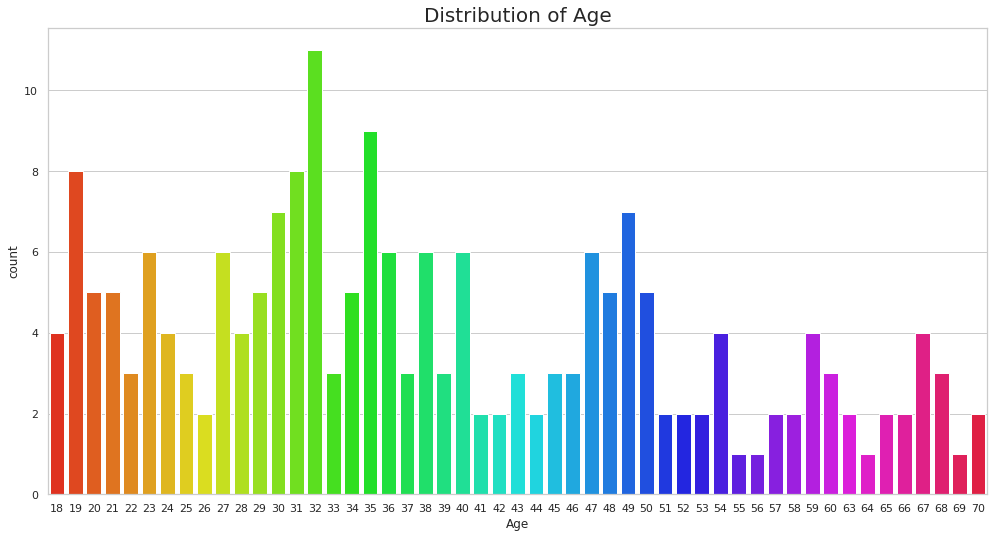

In [48]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

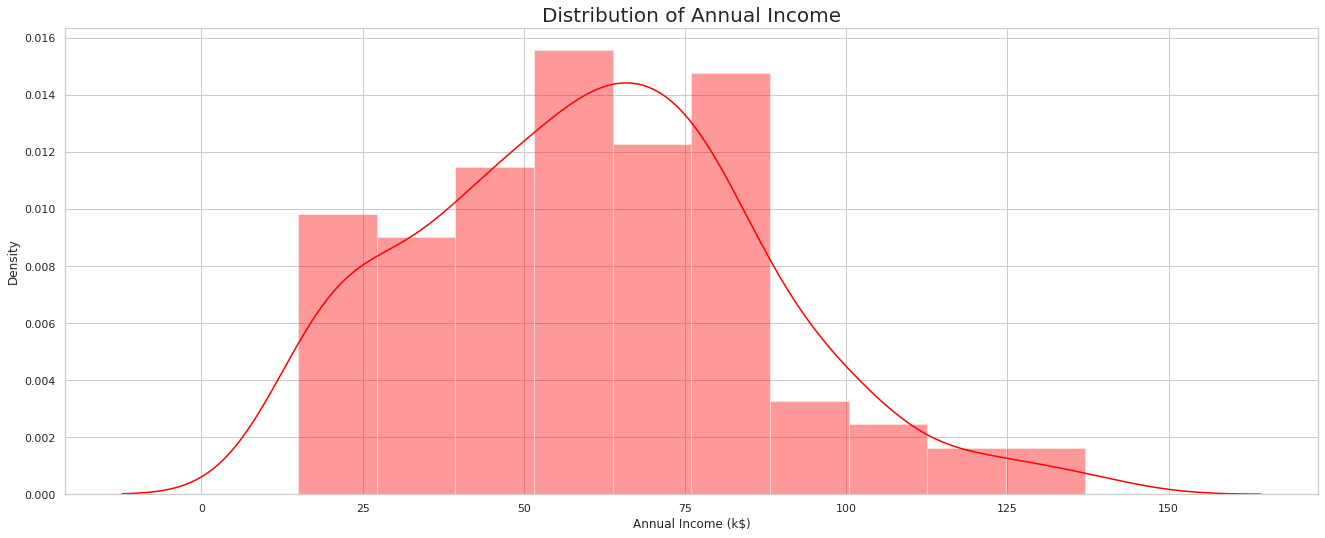

In [49]:
# lets check the sitribution of Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

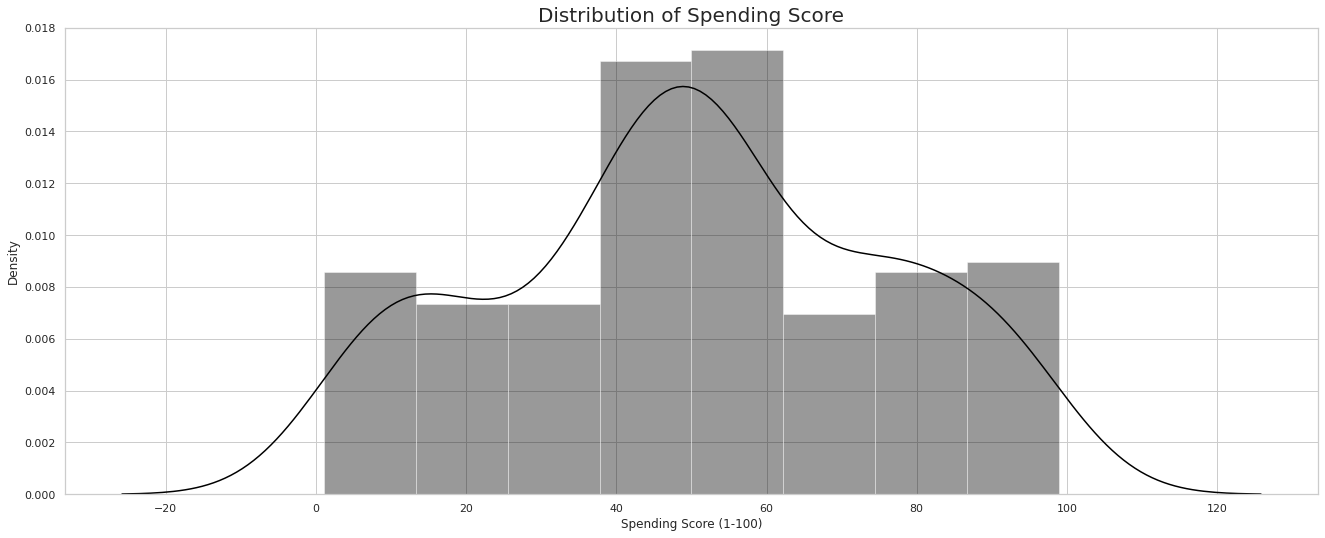

In [50]:
# lets check the distribution of Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

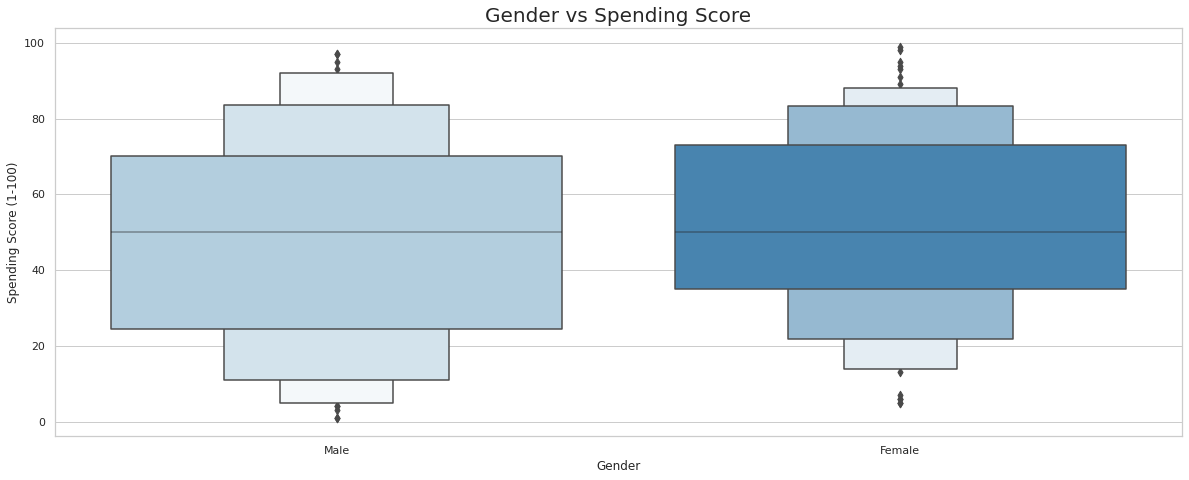

In [51]:
#  Gender vs Spendscore
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

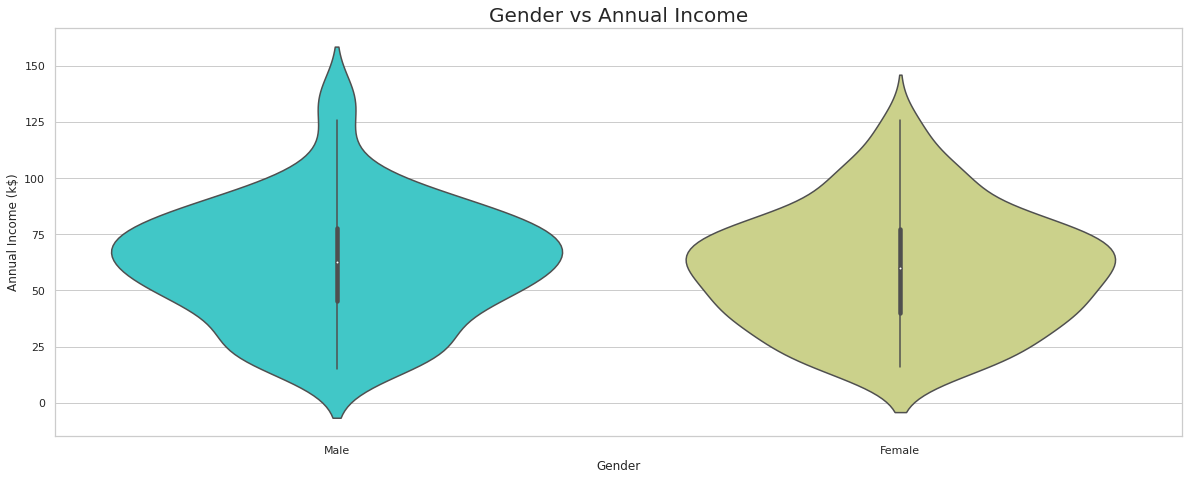

In [52]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

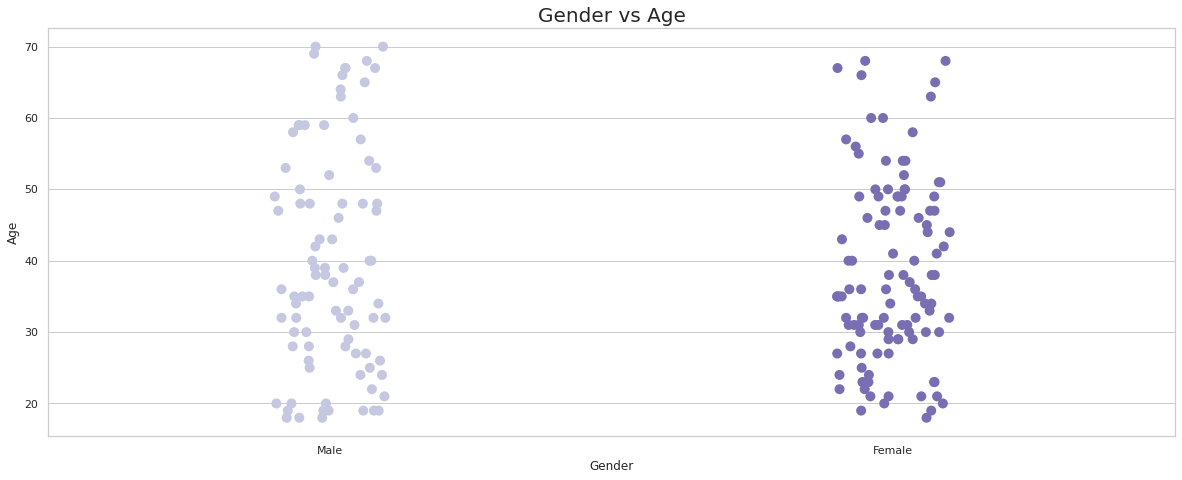

In [53]:
# Gender vs Age
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

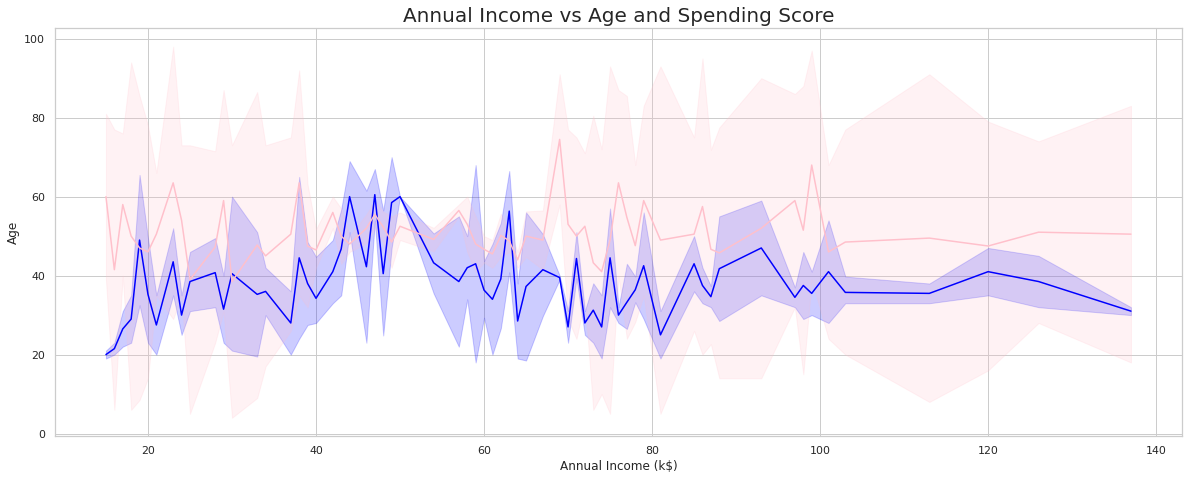

In [54]:
# Annual Income vs Age and Spending Score
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

###Clustering Analysis

In [55]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [56]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


###K-Means Algorithm



#####The Elbow method to find the number of optimal clusters

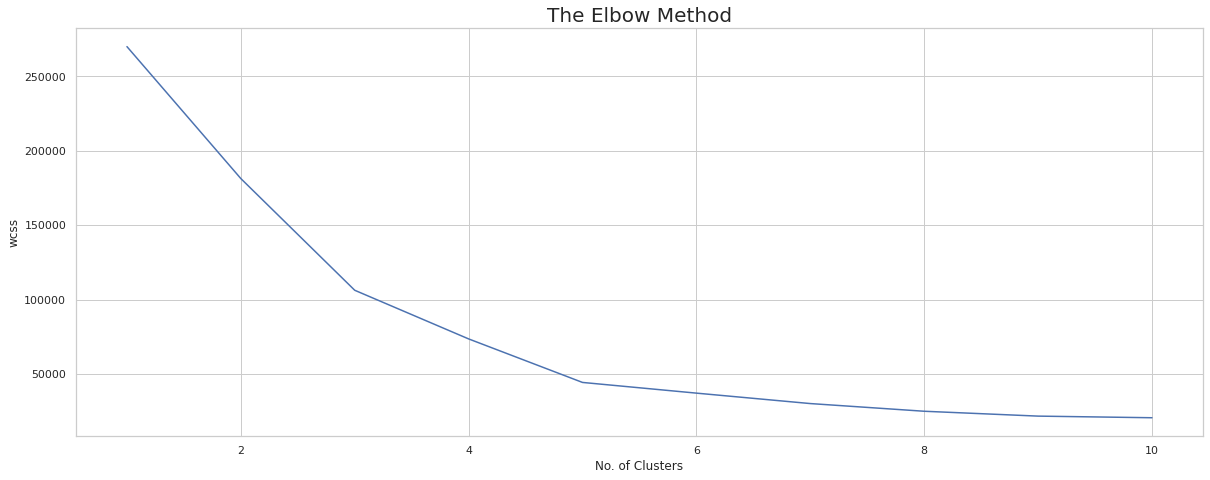

In [57]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
#Cluster number is 5 because after 5 curve changes very very slowly.

###Visualizing the Clusters

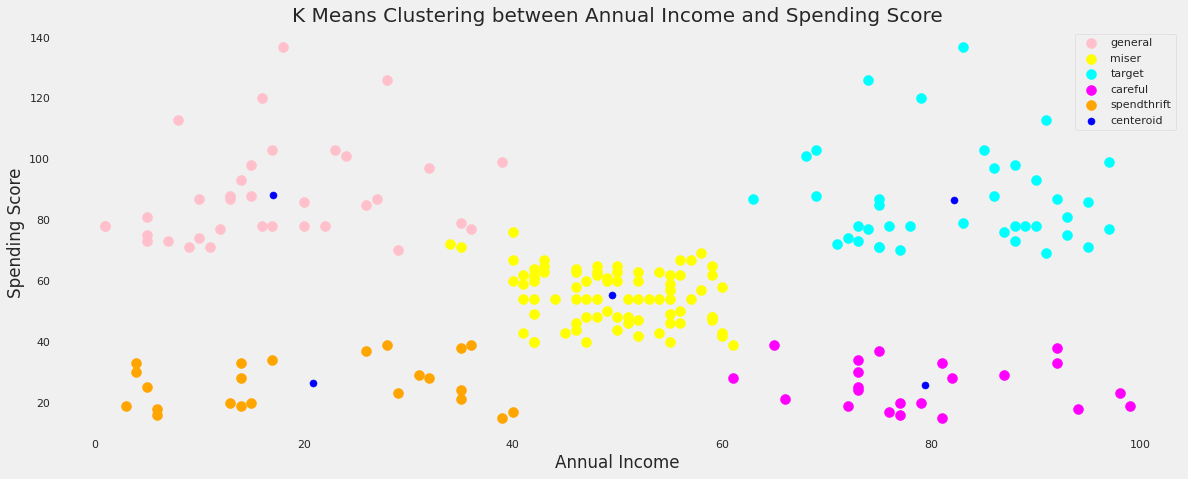

In [58]:
# lets visualize these clusters
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

###Clustering between age and spending score

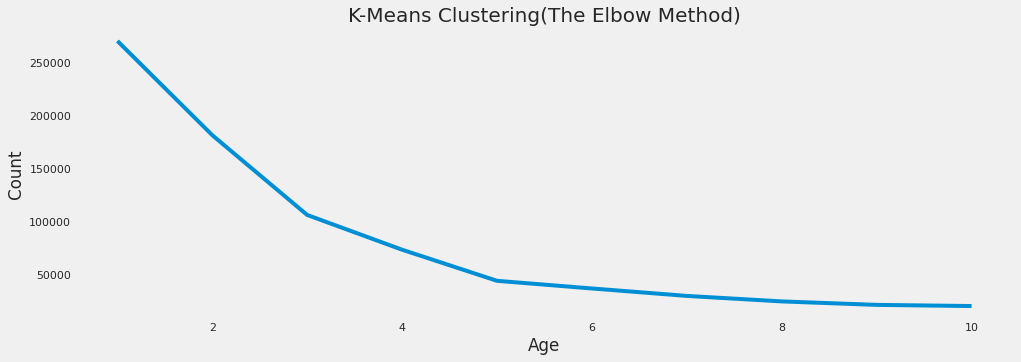

In [59]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()
#Cluster number is 4 because after 4 curve changes very very slowly.

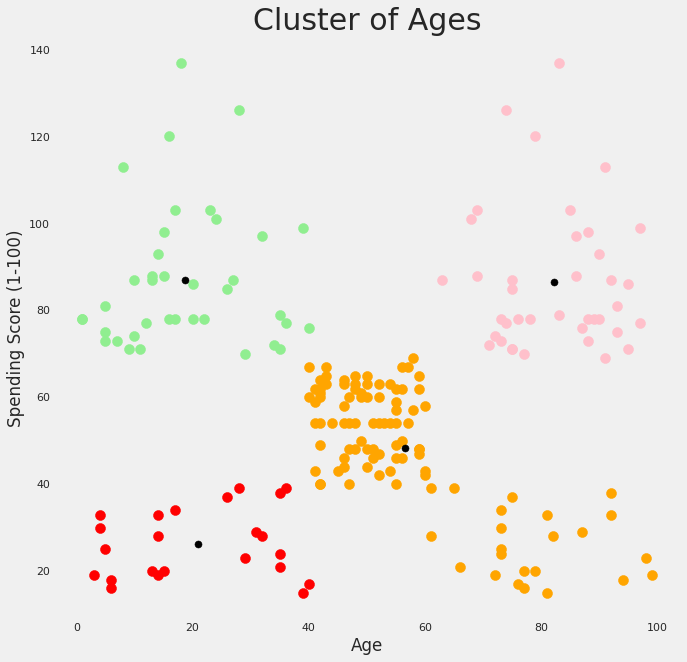

In [60]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange',)
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen',)
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()